## Imports Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

**load our dataset**

In [2]:
df = pd.read_csv("Brain Tumor.csv")

In [3]:
df

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


<AxesSubplot:>

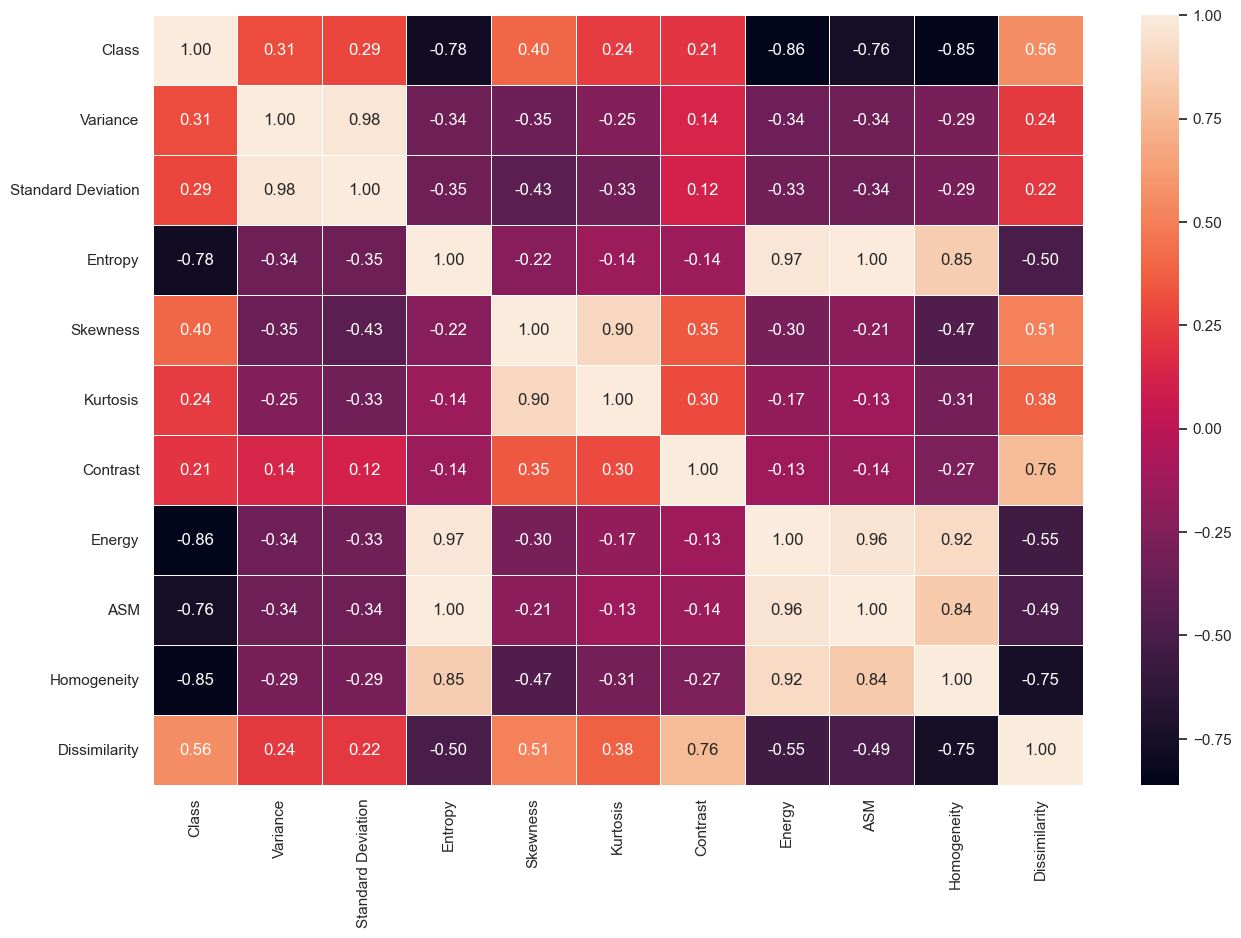

In [102]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f")

**Drop The columns which are not Important**

In [5]:
df.drop(['Mean',"Correlation","Image","Coarseness"],axis=1,inplace=True)

In [7]:
df.head()

,Class,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity
0,0,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346
1,0,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072
2,1,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800
3,1,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919
4,0,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689


**Check for the null values**

In [10]:
df.isnull().sum()

Class                 0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
dtype: int64

**Normalize our dataset using MinMaxScaler**

In [12]:
x = df.drop("Class",axis=1)
y = df["Class"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

x_train = pd.DataFrame(x_train_scaled)
x_test = pd.DataFrame(x_test_scaled)

In [13]:
x_test

,0,1,2,3,4,5,6,7,8,9
0,0.445511,0.656627,0.130307,0.038740,0.005385,0.056539,0.307459,0.112961,0.515708,0.155604
1,0.014441,0.094763,0.653748,0.047097,0.006610,0.001414,0.780054,0.623334,0.929645,0.011809
2,0.248111,0.481890,0.173539,0.007766,0.000688,0.034001,0.362189,0.151175,0.638382,0.118263
3,0.101300,0.296677,0.003771,0.128692,0.028652,0.032850,0.027105,0.003017,0.243362,0.225550
4,0.116512,0.320393,0.369783,0.014893,0.001629,0.010515,0.562926,0.338181,0.758656,0.055407
...,...,...,...,...,...,...,...,...,...,...
748,0.122197,0.328857,0.736265,0.047364,0.006717,0.015999,0.838245,0.714391,0.821239,0.060080
749,0.292030,0.525507,0.000537,0.079393,0.014214,0.040465,0.004713,0.000428,0.263187,0.218999
750,0.350618,0.578878,0.258616,0.010968,0.001105,0.035446,0.458521,0.231731,0.631759,0.137705
751,0.220554,0.452530,0.255842,0.044928,0.006205,0.028936,0.456126,0.229522,0.538106,0.145229


## Model Building

1. RandomForestClassifier
2. LogisticRegression
3. xgboost
4. SVC

### RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,n_estimators=150)

rf.fit(x_train,y_train)

rf.score(x_test,y_test)

random_forest_pred = rf.predict(x_test)

accuracy = accuracy_score(y_test,random_forest_pred)*100

rounded_accuracy = round(accuracy, 1)

print(f'Accuracy Random_Forest: {rounded_accuracy} %')

Accuracy Random_Forest: 98.4 %


### LogisticRegression

In [15]:
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression(random_state=42,C=25,)

lr.fit(x_train,y_train)
`
lr.score(x_test,y_test)

lr_prediction = lr.predict(x_test)

accuracy = accuracy_score(y_test,lr_prediction)*100

rounded_accuracy = round(accuracy, 1)

print(f'Accuracy Random_Forest: {rounded_accuracy} %')

Accuracy Random_Forest: 97.3 %


### SVC

In [16]:
from sklearn.svm import SVC

model = SVC(C=15,kernel = "rbf",random_state = 42)

model.fit(x_train,y_train)

model.score(x_test,y_test)

svc_prediction = model.predict(x_test)

accuracy = accuracy_score(y_test,svc_prediction)*100

rounded_accuracy = round(accuracy, 1)

print(f'Accuracy Random_Forest: {rounded_accuracy} %')

Accuracy Random_Forest: 97.9 %


### xgboost

In [17]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(random_state = 42,n_estimators=150)

xgb_classifier.fit(x_train,y_train)

xgb_classifier.score(x_test,y_test)

xgb_prediction = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test,xgb_prediction)*100

rounded_accuracy = round(accuracy, 1)

print(f'Accuracy Random_Forest: {rounded_accuracy} %')

Accuracy Random_Forest: 98.1 %


### Confusion matrix for Random Forest

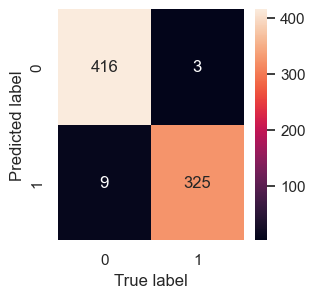

In [18]:
sns.set(font_scale=1.0)

def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     fmt="d")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,random_forest_pred)

### Confusion matrix for Logestic Regression

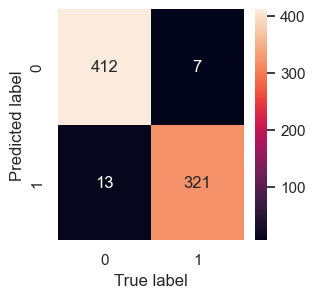

In [19]:
sns.set(font_scale=1.0)

def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     fmt="d")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,lr_prediction)

### Confusion matrix for  SVC

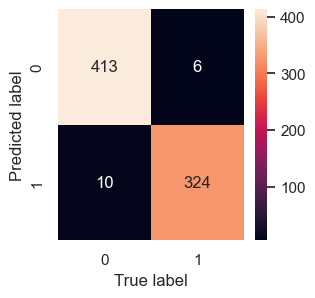

In [95]:
def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     fmt="d")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,svc_prediction)

### Confusion matrix for  XGBOOST

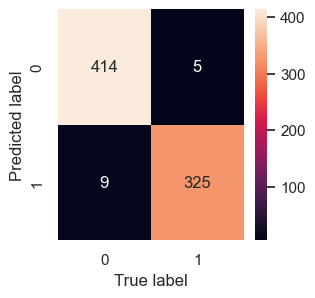

In [21]:
sns.set(font_scale=1.0)

def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     fmt="d")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,xgb_prediction`)

**Bar Plot for comparision**

In [77]:
laccuracy=accuracy_score(y_test,lr_prediction)*100
faccuracy = accuracy_score(y_test,random_forest_pred)*100
svcacc = accuracy_score(y_test,svc_prediction)*100
xgbacc = accuracy_score(y_test,xgb_prediction)*100
models = ['RandomForest', ' LogisticRegression', 'SVC', 'xgboost']
accuracy_scores = [faccuracy,laccuracy , svcacc, xgbacc]


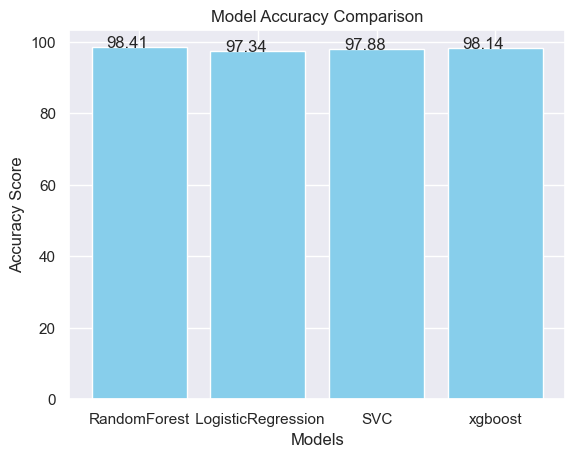

In [78]:
bars = plt.bar(models, accuracy_scores, color='skyblue')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')

for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.03, f'{accuracy:.2f}', ha='center')




Conclusion:

In the above the model Random forest is Doing better than others with Acc score of 98.41 in brain Tumor Prediction


### Save and  Load our model

In [97]:
import joblib

filename='random_forest_v2.joblib'

joblib.dump(rf,open(filename,'wb'))


tumor_model = joblib.load(open(filename,'rb'))

### Prediction with our Model

In [100]:
tumor_model = joblib.load('random_forest_v2.joblib')

y_prediction = tumor_model.predict(x_test)

In [101]:
print(classification_report(y_prediction,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       425
           1       0.97      0.99      0.98       328

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

